In [32]:
# Loading all packages + ignoring warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error as mse
#warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import requests
from datetime import datetime
import json
#import matplotlib

True
-----
dict length: 140
-----
   Year Month  Average_nSearches
0  2007    01                 89
1  2007    02                 85
2  2007    03                 76
3  2007    04                 78
4  2007    05                 78


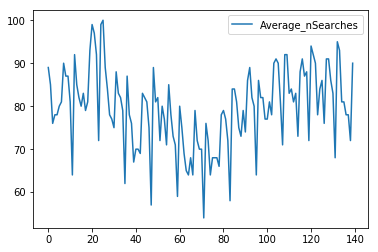

In [33]:
# Search for 'job' 2004-
#url = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222004-01-01+2018-08-26%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22job%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4QYUBiTZJun1Tk9Ech73slURKjPDR2E&tz=-120'

# Search for 'job' 2007-
url = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-26%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22job%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4RI6yZKs5mOYWQcDQbmz6LznHRogHPv&tz=-120'


# Search for 'job' last 12 months
#url = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222017-08-26+2018-08-26%22,%22resolution%22:%22WEEK%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22job%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4QYrGUU6pWSo1zs0zJvLwLnU9iRellO&tz=-120'

response = requests.get(url)
print(response.ok)
print('-----')
dict = json.loads(response.text.split(")]}\',\n")[1])
#print(dict)

# saving length of the timelineData dict
dict_length = len(dict['default']['timelineData'])
print('dict length: ' + str(dict_length)); print('-----')

timelinedata_list = [] 

for i in range(0,dict_length):
    # Extracting value (keyword: 'time')
    time = dict['default']['timelineData'][i]['time']
    
    year = datetime.utcfromtimestamp(int(time)).strftime('%Y')
    month = datetime.utcfromtimestamp(int(time)).strftime('%m')

    # Extracting value (keyword: 'value'). Pulling out first element, since list with one element.
    value = dict['default']['timelineData'][i]['value'][0]
    
    
    help_list =[]
    help_list.append(year)
    help_list.append(month)
    help_list.append(value)
    timelinedata_list.append(help_list)
    
#print(timelinedata_list)

df = pd.DataFrame(timelinedata_list)
df.columns = ['Year', 'Month' , 'Average_nSearches']
#print(df)

df2 = df.groupby(['Year', 'Month'], as_index=False).mean()
print(df2.head())
df2.plot()
#out = time.strftime("%a, %d %b %Y %H:%M:%S %Z", time.localtime(test))
#print(dict['default']['timelineData'][1]['time'])
#print(dict['default']['timelineData'][1]['value'])#.keys())

#print(datetime.utcfromtimestamp(test).strftime('%m'))





----unemp_rates----
      Date  Bruttoledige  Year Month
0  2007M01           3.8  2007    01
1  2007M02           3.8  2007    02
2  2007M03           3.4  2007    03
3  2007M04           3.2  2007    04
4  2007M05           3.0  2007    05
----df3----
   Year Month  Average_nSearches
0  2007    01                 89
1  2007    02                 85
2  2007    03                 76
3  2007    04                 78
4  2007    05                 78
        Date  Bruttoledige  Year Month
88   2014M05           5.2  2014    05
89   2014M06           5.3  2014    06
90   2014M07           5.3  2014    07
91   2014M08           5.3  2014    08
92   2014M09           5.1  2014    09
93   2014M10           5.1  2014    10
94   2014M11           5.2  2014    11
95   2014M12           5.5  2014    12
96   2015M01           5.7  2015    01
97   2015M02           5.9  2015    02
98   2015M03           6.0  2015    03
99   2015M04           5.8  2015    04
100  2015M05           5.4  2015    05
10

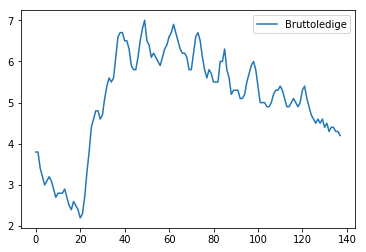

In [34]:
# Read unemployment data from csv
unemp_rates = pd.read_excel('/Users/karlbindslev/Documents/GitHub/sds_group29/Bruttoledige4.xlsx')
unemp_rates['Year'] =  [x[0:4] for x in unemp_rates['Date']]
unemp_rates['Month'] =  [x[5:] for x in unemp_rates['Date']]
print('----unemp_rates----')
print(unemp_rates.head())
df3 = df2[0:len(unemp_rates)]
print('----df3----')
print(df3.head())
X = np.array(df3['Average_nSearches']).reshape(-1, 1) # creating ndarray of X values
y = np.array(unemp_rates['Bruttoledige']).reshape(-1, 1) # creating ndarray of y values

# Security check to ensure that length of variable lists match.
if (len(X)-len(y)!=0):
    print('-------------------------------------------------------------------')
    print('----WARNING: Number of observations in X and y does not match!!----')
    print('-------------------------------------------------------------------')

unemp_rates.plot()
print(unemp_rates[-50:])
print(y)
#print(X)
#print(y)

0.0001    1.032515
dtype: float64
Lasso 1.396
    y_test    y_pred
0      5.0  5.077800
1      4.9  4.908913
2      6.8  4.346327
3      6.3  5.948373
4      3.8  3.222267
5      5.8  4.994522
6      3.4  5.459240
7      3.2  5.313655
8      3.1  5.158749
9      5.3  5.237367
10     5.3  4.033576
11     6.1  4.543176
12     6.2  5.387612
13     5.5  5.722448
14     5.2  5.158749
15     5.3  4.638106
16     2.8  4.033576
17     6.0  4.730705
18     4.4  3.097045
19     5.0  4.543176
20     5.3  4.820974
21     4.5  4.140156
22     5.8  5.077800
23     5.3  4.033576
24     5.0  4.445917
25     6.5  5.840071
26     4.5  5.948373
27     6.2  6.445504
28     6.5  6.137014
29     2.7  4.994522
30     2.8  6.137014
31     4.9  5.660141
32     4.8  5.313655
33     3.8  4.346327
34     5.4  4.908913
35     4.3  5.313655
36     5.1  4.994522
37     6.1  5.782424
38     2.9  4.730705
39     4.7  5.528537
40     5.8  5.077800
41     6.0  4.820974
42     5.5  5.387612
43     5.1  5.077800
44     3.

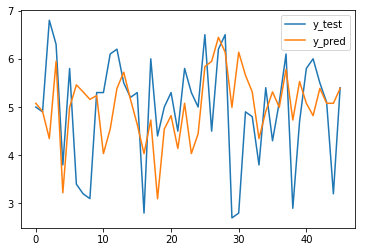

In [35]:
# ------ML part------- #
# In PolynomialFeatures(degree=p), p=2 is default - do loop as in lec 12 to try different order polys.
# Maybe do plot to show that MSE converges to zero for p+++ - overfitting

# splitting into development (2/3) and test data (1/3)
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=1/3, random_state=2)
# splitting development into train (1/3) and validation (1/3)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=1/2, random_state=2)


# ------Lasso------- #

perform = []
lambdas = np.logspace(-4, 4, 33)
for lambda_ in lambdas:
    pipe_lasso = make_pipeline(PolynomialFeatures(include_bias=False), 
                               StandardScaler(),
                               Lasso(alpha=lambda_, random_state=1))
    pipe_lasso.fit(X_train, y_train)
    y_pred = pipe_lasso.predict(X_val) # Transformation?
    perform.append(mse(y_pred, y_val))
    
hyperparam_perform = pd.Series(perform,index=lambdas)

optimal = hyperparam_perform.nsmallest(1)    
print(optimal) # optimal lambda

# using optimal lambda in new pipe
pipe_lasso = make_pipeline(PolynomialFeatures(include_bias=False), # dont use poly features for OLS
                           StandardScaler(),
                           Lasso(alpha=optimal.index[0]))

pipe_lasso.fit(X_dev,y_dev) # Fitting model to development data set using new pipe
print('Lasso', round(mse(pipe_lasso.predict(X_test),y_test), 3))
#print('LinReg', round(mse(pipe_lr.predict(X_test),y_test), 3))
y_pred = pipe_lasso.predict(X_test)
df_y_test = pd.DataFrame(y_test)
df_y_pred = pd.DataFrame(y_pred)

df_ = pd.DataFrame()
df_['y_test'] = df_y_test[0]
df_['y_pred'] = df_y_pred[0]

print(df_)#.head())
#df_.reset_index(drop=True)
#df_.reset_index(level=0, inplace=True)
#print(df_.head())
df_.plot()
#test = np.ndarray()



# ----- 10/5 fold CV --------#



In [36]:
# Requires the pytrends library. To install, run "pip install pytrends".
from pytrends.pyGTrends import pyGTrends
import time
import os
from random import randint
import pandas as pd
 
# Add your Gmail username to the google_username variable and your Gmail password to the google_password variable.
google_username = "karlbindslev@gmail.com"
google_password = "Qcb48sgn"
connector = pyGTrends(google_username, google_password)
 
# This script downloads a series of CSV files from Google Trends. Please specify a filepath for where you'd like these files to be stored in the below variable.
path = ""
 
# Specify the filename of a CSV with a list of keywords in the variable, keyordcsv. The CSV should be one column, with header equal to Keywords (case sensitive).
keywordcsv = "keywords.csv"
keywords = pd.read_csv(keywordcsv)
 
# Downloads and Calculate Slope:
keywordlist = pd.DataFrame(columns=["keyword","slope"])
for index, row in keywords.iterrows():
    print("Downloading Keyword #" + str(index))
    payload = {'geo': 'US', 'q': [row[0]]}
    connector.request_report(payload)
    time.sleep(randint(5, 10))
    connector.save_csv(path, str(index))
    csvname = str(index)+".csv"
    trenddata = pd.read_csv(csvname, skiprows=4, names=['date', 'values'])
    keyword = trenddata['values'].loc[[0]][0]
    trenddata = trenddata.ix[1:]
    trenddata['keyword'] = keyword
    trenddata.rename(columns={'values': 'trends'}, inplace=True)
    trenddata['trends'] = pd.to_numeric(trenddata['trends'], errors='coerce')
    trenddata['date'] = trenddata['date'].str.extract('(^[0-9]{4}\-[0-9]{2}\-[0-9]{2}) \-.*')
    trenddata = trenddata.dropna()
    trenddata['date'] = pd.to_datetime(trenddata['date'])
    trenddata['year'] = pd.DatetimeIndex(trenddata['date']).year
    trenddata['month'] = pd.DatetimeIndex(trenddata['date']).month
    trenddata['day'] = pd.DatetimeIndex(trenddata['date']).day
 
    maxyear = trenddata['year'].max()
    grouped = trenddata.groupby(['year']).mean()
 
    def slope_formula(xone, yone, xtwo, ytwo):
        return (ytwo-yone)/(xtwo-xone)
 
    maxyear = trenddata['year'].max()
    grouped = trenddata.groupby(['year']).mean()
    slope = slope_formula(1,float(grouped.loc[grouped.index==maxyear-2]['trends']),
                          2,float(grouped.loc[grouped.index==maxyear-1]['trends']))
    keywordlist = keywordlist.append({'keyword':keyword,'slope':slope}, ignore_index=True)
    os.remove(csvname)
 
# Specify a csv filename to output the slope values.
keywordlist.to_csv("trends_slope.csv", sep=",", encoding="utf-8", index=False)
 
print("Slope calculation and CSV export complete.")

ModuleNotFoundError: No module named 'pytrends.pyGTrends'